In [42]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df=pd.read_csv("C:/Users/aditi/Downloads/brain_stroke (1).csv")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [45]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [46]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [47]:
df['gender']=df['gender'].map({'Male':1,'Female':0})

In [48]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,1,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [49]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [50]:
df['ever_married']=df['ever_married'].map({'Yes':1,'No':0})

In [51]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
2,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
3,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
4,1,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [52]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [53]:
df['Residence_type']=df['Residence_type'].map({'Urban':1,'Rural':0})

In [54]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [55]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
2,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
3,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
4,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1


In [56]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [57]:
df['work_type']=df['work_type'].map({'Private':0,'Self-employed':1,'Govt_job':2,'children':3})

In [58]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,1,0,0,105.92,32.5,never smoked,1
2,0,49.0,0,0,1,0,1,171.23,34.4,smokes,1
3,0,79.0,1,0,1,1,0,174.12,24.0,never smoked,1
4,1,81.0,0,0,1,0,1,186.21,29.0,formerly smoked,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 428.2+ KB


In [60]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [61]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [62]:
df['smoking_status']=df['smoking_status'].map({'formerly smoked':0,'never smoked':1,'smokes':2,'Unknown':3})

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 428.2 KB


In [64]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.6,0,1
1,1,80.0,0,1,1,0,0,105.92,32.5,1,1
2,0,49.0,0,0,1,0,1,171.23,34.4,2,1
3,0,79.0,1,0,1,1,0,174.12,24.0,1,1
4,1,81.0,0,0,1,0,1,186.21,29.0,0,1


In [65]:
df['age']=df['age'].astype(int)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   int32  
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
 10  stroke             4981 non-null   int64  
dtypes: float64(2), int32(1), int64(8)
memory usage: 408.7 KB


In [67]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,0,1,228.69,36.6,0,1
1,1,80,0,1,1,0,0,105.92,32.5,1,1
2,0,49,0,0,1,0,1,171.23,34.4,2,1
3,0,79,1,0,1,1,0,174.12,24.0,1,1
4,1,81,0,0,1,0,1,186.21,29.0,0,1


In [68]:
import seaborn as sns

<AxesSubplot:xlabel='age', ylabel='stroke'>

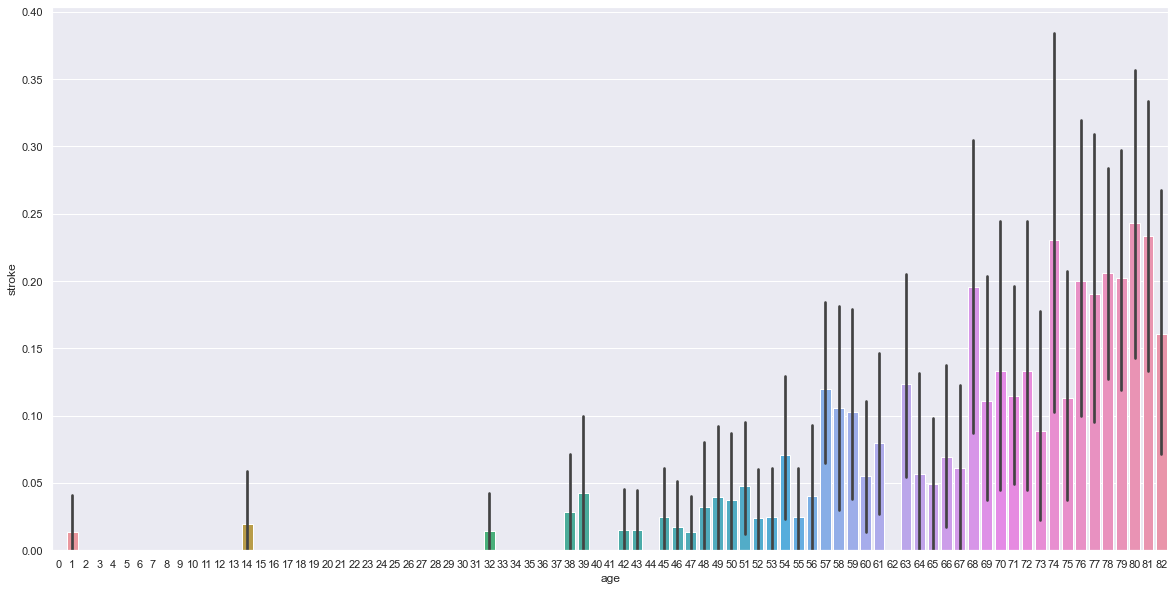

In [69]:
sns.barplot('age','stroke',data=df)

<AxesSubplot:xlabel='gender', ylabel='stroke'>

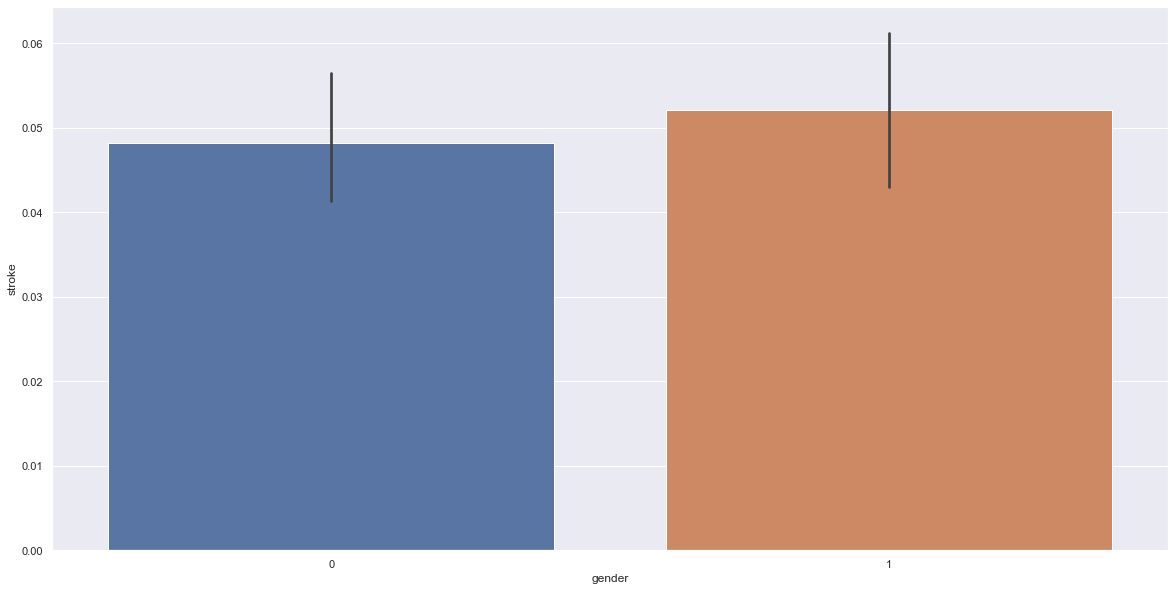

In [70]:
sns.barplot('gender','stroke',data=df)

<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

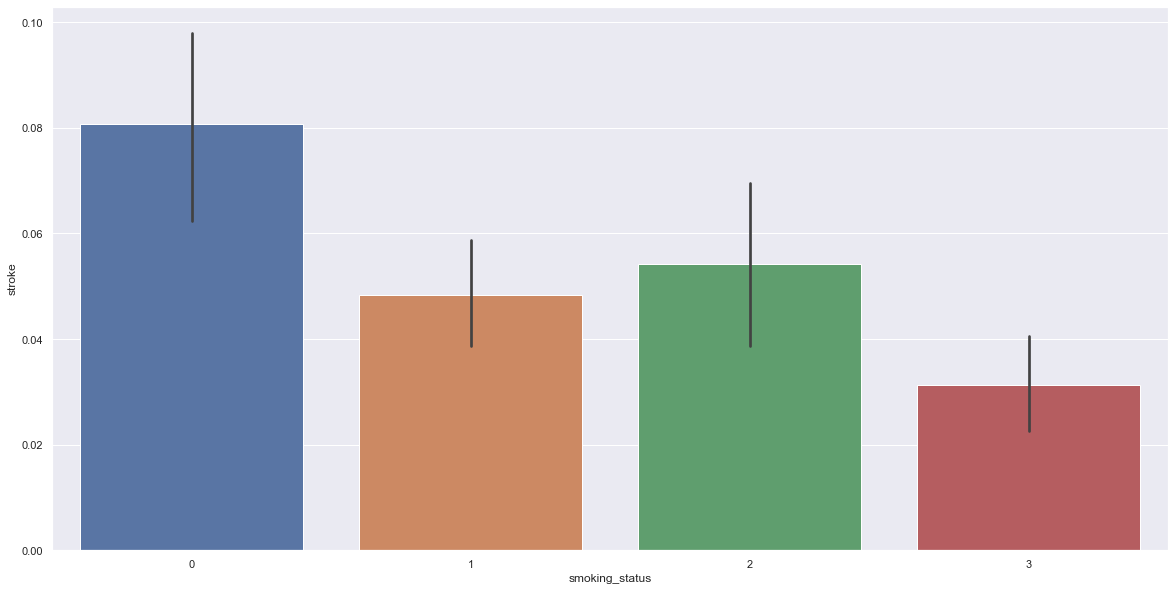

In [71]:
sns.barplot('smoking_status','stroke',data=df)

In [72]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.026634,0.021485,0.086476,-0.028971,0.063684,-0.004301,0.055796,-0.012093,0.039050,0.008870
age,-0.026634,1.000000,0.278022,0.264725,0.677196,-0.407074,0.017148,0.236650,0.374064,-0.377382,0.246349
hypertension,0.021485,0.278022,1.000000,0.111974,0.164534,-0.073155,-0.004755,0.170028,0.158762,-0.127008,0.131965
heart_disease,0.086476,0.264725,0.111974,1.000000,0.114765,-0.056632,0.002125,0.166847,0.060926,-0.064861,0.134610
ever_married,-0.028971,0.677196,0.164534,0.114765,1.000000,-0.365538,0.008191,0.150724,0.371690,-0.306390,0.108398
work_type,0.063684,-0.407074,-0.073155,-0.056632,-0.365538,1.000000,0.008475,-0.069794,-0.369027,0.312169,-0.056713
Residence_type,-0.004301,0.017148,-0.004755,0.002125,0.008191,0.008475,1.000000,0.001346,0.013185,0.003405,0.016494
avg_glucose_level,0.055796,0.236650,0.170028,0.166847,0.150724,-0.069794,0.001346,1.000000,0.186348,-0.097531,0.133227
bmi,-0.012093,0.374064,0.158762,0.060926,0.371690,-0.369027,0.013185,0.186348,1.000000,-0.255127,0.056926
smoking_status,0.039050,-0.377382,-0.127008,-0.064861,-0.306390,0.312169,0.003405,-0.097531,-0.255127,1.000000,-0.066612


<AxesSubplot:>

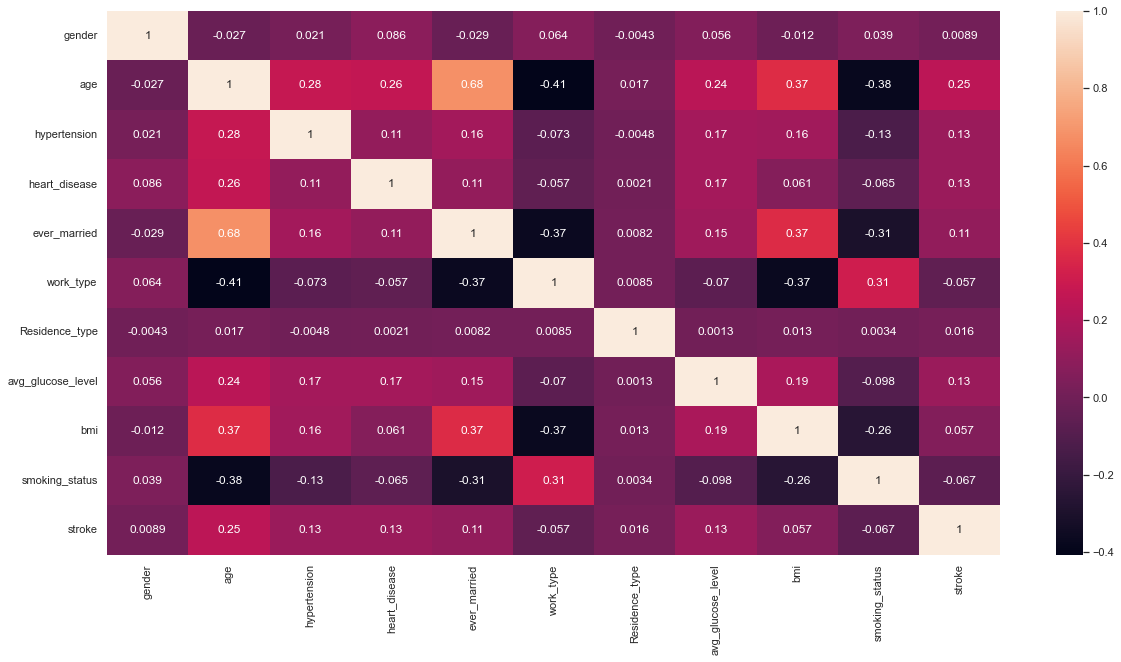

In [73]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(df.corr(),annot=True,fmt='.2g')

In [74]:
df.drop('work_type',axis=1,inplace=True)

In [75]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,1,228.69,36.6,0,1
1,1,80,0,1,1,0,105.92,32.5,1,1
2,0,49,0,0,1,1,171.23,34.4,2,1
3,0,79,1,0,1,0,174.12,24.0,1,1
4,1,81,0,0,1,1,186.21,29.0,0,1


In [76]:
df.drop('smoking_status',axis=1,inplace=True)

In [77]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,1,67,0,1,1,1,228.69,36.6,1
1,1,80,0,1,1,0,105.92,32.5,1
2,0,49,0,0,1,1,171.23,34.4,1
3,0,79,1,0,1,0,174.12,24.0,1
4,1,81,0,0,1,1,186.21,29.0,1


In [78]:
df['stroke'].unique()

array([1, 0], dtype=int64)

# Data Preprocessing

In [89]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  4981
Columns  :  9

Features : 
 ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke']

Missing values :   0

Unique values :  
 gender                  2
age                    83
hypertension            2
heart_disease           2
ever_married            2
Residence_type          2
avg_glucose_level    3895
bmi                   342
stroke                  2
dtype: int64


In [90]:
age_outliers=df.loc[df['age']>70]
age_outliers['bmi'].shape

(707,)

In [91]:
# mean with outliers 
print(age_outliers['stroke'].value_counts())

0    579
1    128
Name: stroke, dtype: int64


In [92]:
df["age"] = df["age"].apply(lambda x: 70 if x>570 else x)
df["age"] = df["age"].fillna(28.4)

In [93]:
print ("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   0


In [94]:
cat_df = df[['gender','Residence_type','smoking_status','stroke']]
summary = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
summary

KeyError: "['smoking_status'] not in index"

# Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [80]:
x=df.drop('stroke',axis=1)
y=df['stroke']

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [82]:
cla=RandomForestClassifier()
cla.fit(x_train,y_train)

RandomForestClassifier()

In [83]:
y_pred=cla.predict(x_test)

In [84]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [85]:
accuracy_score(y_test,y_pred)

0.9518555667001003

# Logistic Regression

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

In [87]:
lr = LogisticRegression(random_state = 42)

In [88]:
lr.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [48]:
y_pred_lr = lr.predict(x_test)

In [49]:
accuracy = metrics.accuracy_score(y_test, y_pred_lr)

In [50]:
accuracy

0.9438202247191011

# Support vector machines

In [51]:
x_train.shape

(3735, 8)

In [52]:
y_train.shape

(3735,)

In [53]:
from sklearn.svm import SVC

In [54]:
svc = SVC()

In [55]:
print(x_train.shape)
print(y_train.shape)

if x.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(3735, 8)
(3735,)


In [56]:
svc.fit(x_train, y_train)

SVC()

In [57]:
y_pred_svc = svc.predict(x_test)

In [58]:
accuracy_svc = metrics.accuracy_score(y_test, y_pred_svc)

In [59]:
accuracy_svc

0.9438202247191011

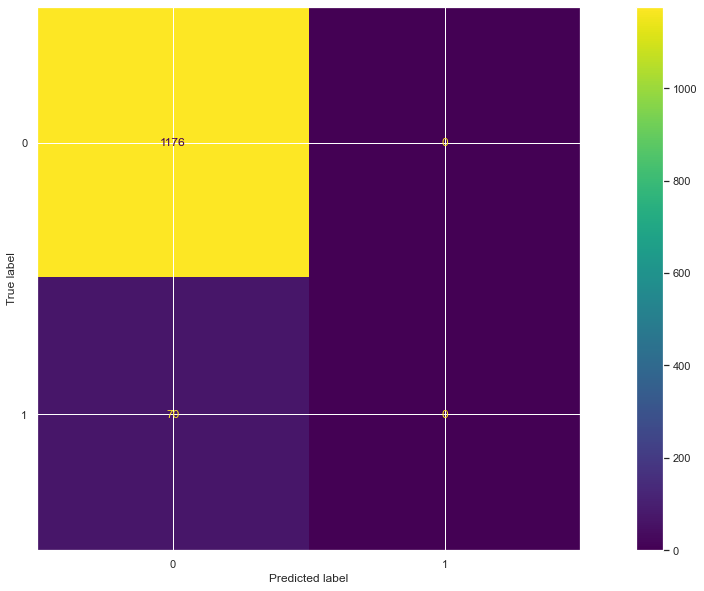

In [60]:
metrics.plot_confusion_matrix(svc,x_test, y_test)

# K-neighbors

In [61]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(x_train,y_train)

predicted= model.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,predicted)
accuracy


0.9333868378812199

# Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
first_tree = DecisionTreeClassifier()
first_tree.fit(x_train, y_train)
y_pred=first_tree.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9036918138041734

# Naive Bayes

In [65]:
from sklearn import metrics

In [66]:
print("Gaussian Naive Bayes model accuracy(in %)", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %) 90.36918138041734


In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1176
           1       0.17      0.19      0.18        70

    accuracy                           0.90      1246
   macro avg       0.56      0.57      0.56      1246
weighted avg       0.91      0.90      0.91      1246

